
**Problem Statment:**
BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

*   *Which variables are significant in predicting the demand for shared bikes.*
*   *How well those variables describe the bike demands*

**Business Goal:**
*You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.*

**Target Variable:**
**cnt**



# **Importing Necessary Libraries**

In [290]:
# For Analysis and Numerical Functions
import pandas as pd
import numpy as np
import calendar
# For Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# For creating train and test split
from sklearn.model_selection import train_test_split
# For scalling
from sklearn.preprocessing import MinMaxScaler
# For selecting the featuer from RFE
from sklearn.feature_selection import RFE
# For creating Lean_Model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# For VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For validating the model
from sklearn.metrics import r2_score
# Remove the warnings
import warnings
warnings.filterwarnings('ignore')

# **Dataset Loading**

Loading Data

In [291]:
bikes=pd.read_csv('day.csv')

Validating Data

In [292]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [293]:
bikes.shape

(730, 16)

In [294]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [295]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# **Data Cleaning**

**Drop the columns:**

**Instant:** It is just a sequance and more like index since we are dealing with dataframe this is not required.

**dteday:** Date is not required, since we have month, year, weekday, weekend details.

**casual and registered:** Not significat to conlude anything against the business goal.
cnt=casual+registered

In [296]:
bikes_df=bikes.drop(['instant', 'dteday','casual','registered'], axis=1)

In [297]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


**Check for duplicates and Null Values**

In [298]:
bikes_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [299]:
round(100*(bikes_df.isnull().sum(axis=1)/len(bikes_df)),2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

**No missing and NULL values**

In [300]:
bikes_df.drop_duplicates()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


**No Duplicates**

In [301]:
bikes_df.shape

(730, 12)

In [302]:
bikes_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [303]:
bikes_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [304]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


**Data presented in the numeric values and we need to make sure that the data must be in the right formate to do EDA analysis. So we need to replace with the help of the data disctionary.**


* season : season (1:spring, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2018, 1:2019)
* mnth : month ( 1 to 12)
* weekday : day of the week
* weathersit : Clear, Moderate, Bad and Extreme

In [305]:
bikes_df['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'], inplace = True)
bikes_df['weathersit']=bikes_df['weathersit'].replace([1, 2, 3], ['Clear', 'Mist_Cloudy', 'Light_Snow_Rain'])


In [306]:

bikes_df.weekday.replace({0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thrusday",5:"friday",6:"saturday"},inplace=True)


In [307]:
# Converting 'mnth' to categorical variable

bikes_df['mnth'] = bikes_df['mnth'].apply(lambda x: calendar.month_abbr[x])
bikes_df['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [308]:
bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [309]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


*Creating categories for analysis*

In [310]:
num_cols=['holiday','workingday','temp','atemp','hum','windspeed','cnt','yr']
cat_cols=['season','mnth','weekday','weathersit']

In [311]:
len(num_cols)+len(cat_cols)

12

# **Univariate Analysis:**

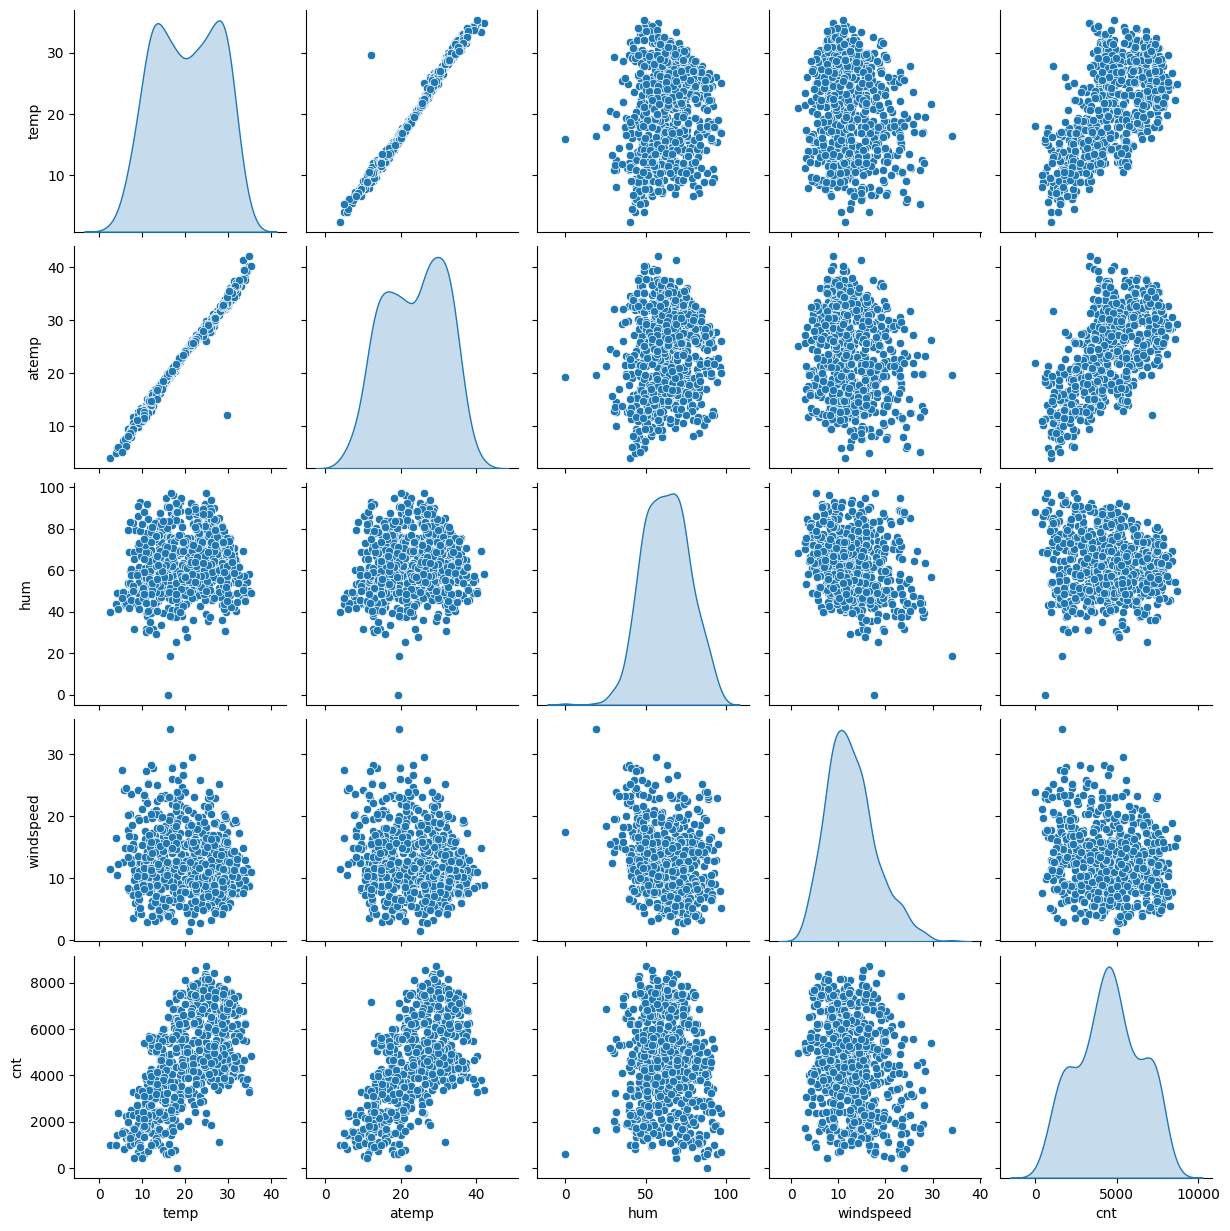

In [312]:
bike_num=bikes_df[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(bike_num, diag_kind='kde')
plt.show()

The above Pair-Plot confirms that there is a LINEAR RELATION between '**temp**','**atemp**' and '**cnt**'

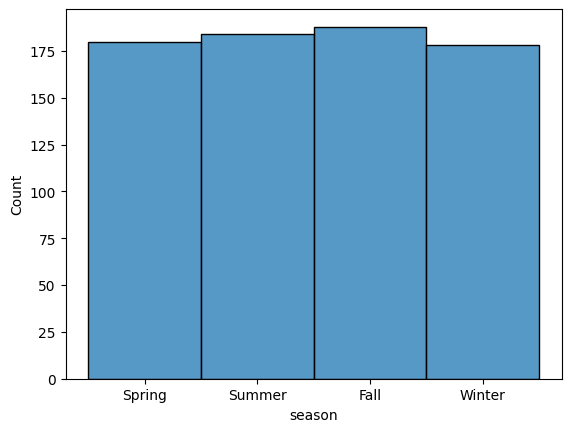

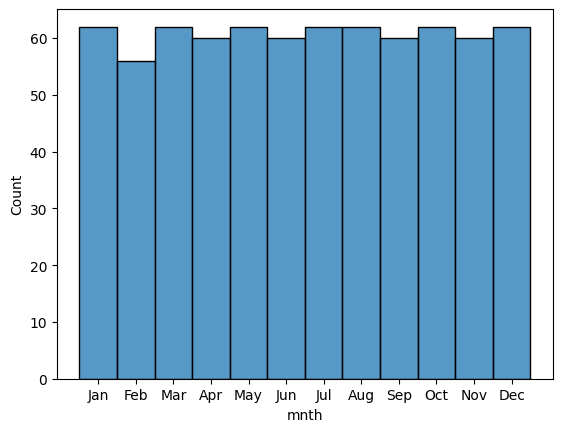

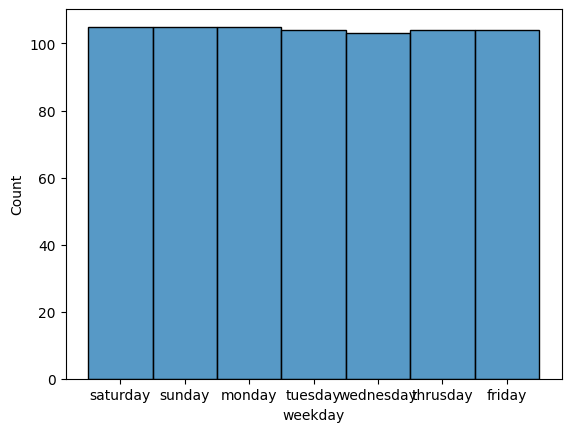

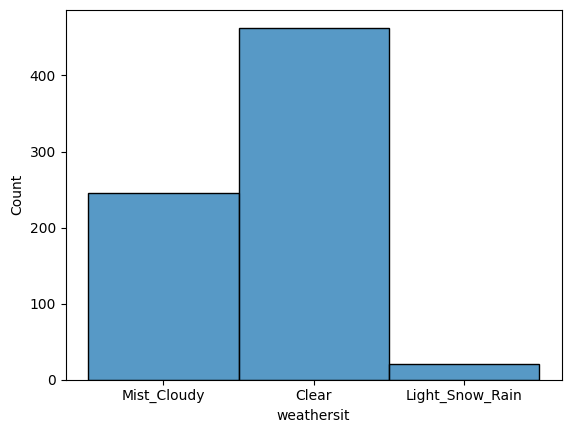

In [313]:
for i in cat_cols:
  sns.histplot(x=bikes_df[i])
  plt.show()

**Observation:**

* Feb month the number of riders were less
* Clear weather has high bike rides

# **Bivariate Analysis:**

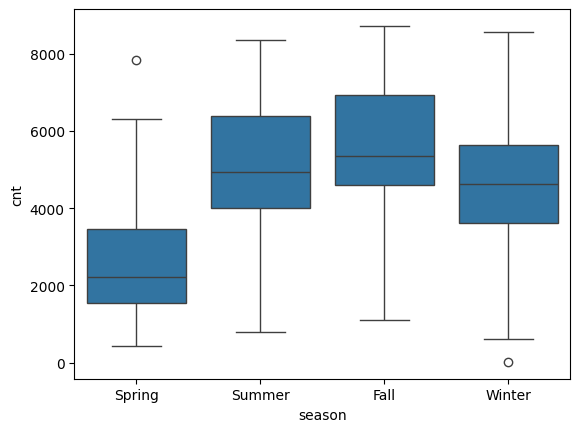

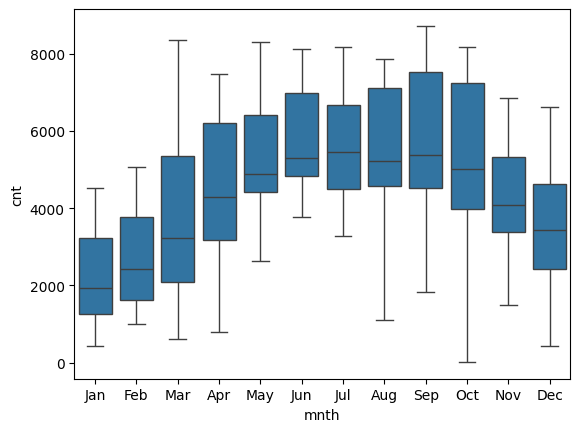

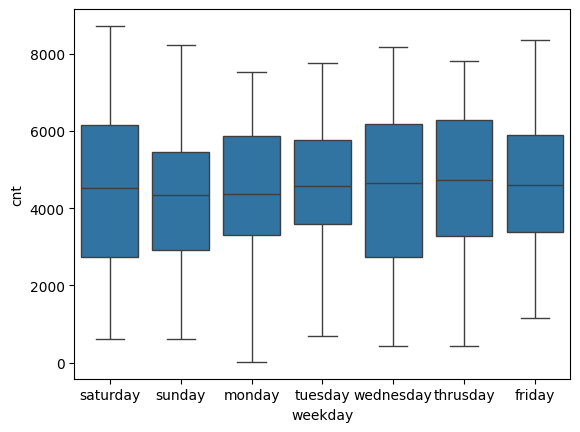

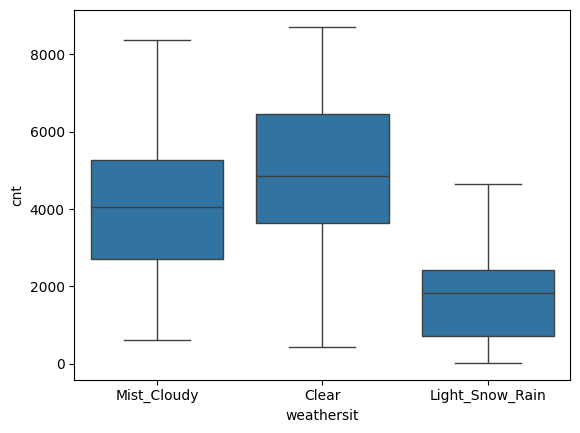

In [314]:
for i in cat_cols:
  sns.boxplot(x=bikes_df[i],y=bikes_df['cnt'])
  plt.show()

**Observation:**
* **Seasons**: Bike rentals are generally higher in fall and summer, with spring having the lowest rentals.
* **Month:** Bike rentals peak during the summer months (June to September) and are lowest in winter months (January, February, December).
* **Weekdays:** Bike rentals are fairly consistent throughout the week with no significant peaks or drops on specific weekdays.
* **Working_Days:** Bike rentals are slightly higher on non-working days compared to working days.
* **Weather Situation:** Bike rentals are highest during good weather conditions and drop significantly during bad weather conditions.

<Figure size 2000x1500 with 0 Axes>

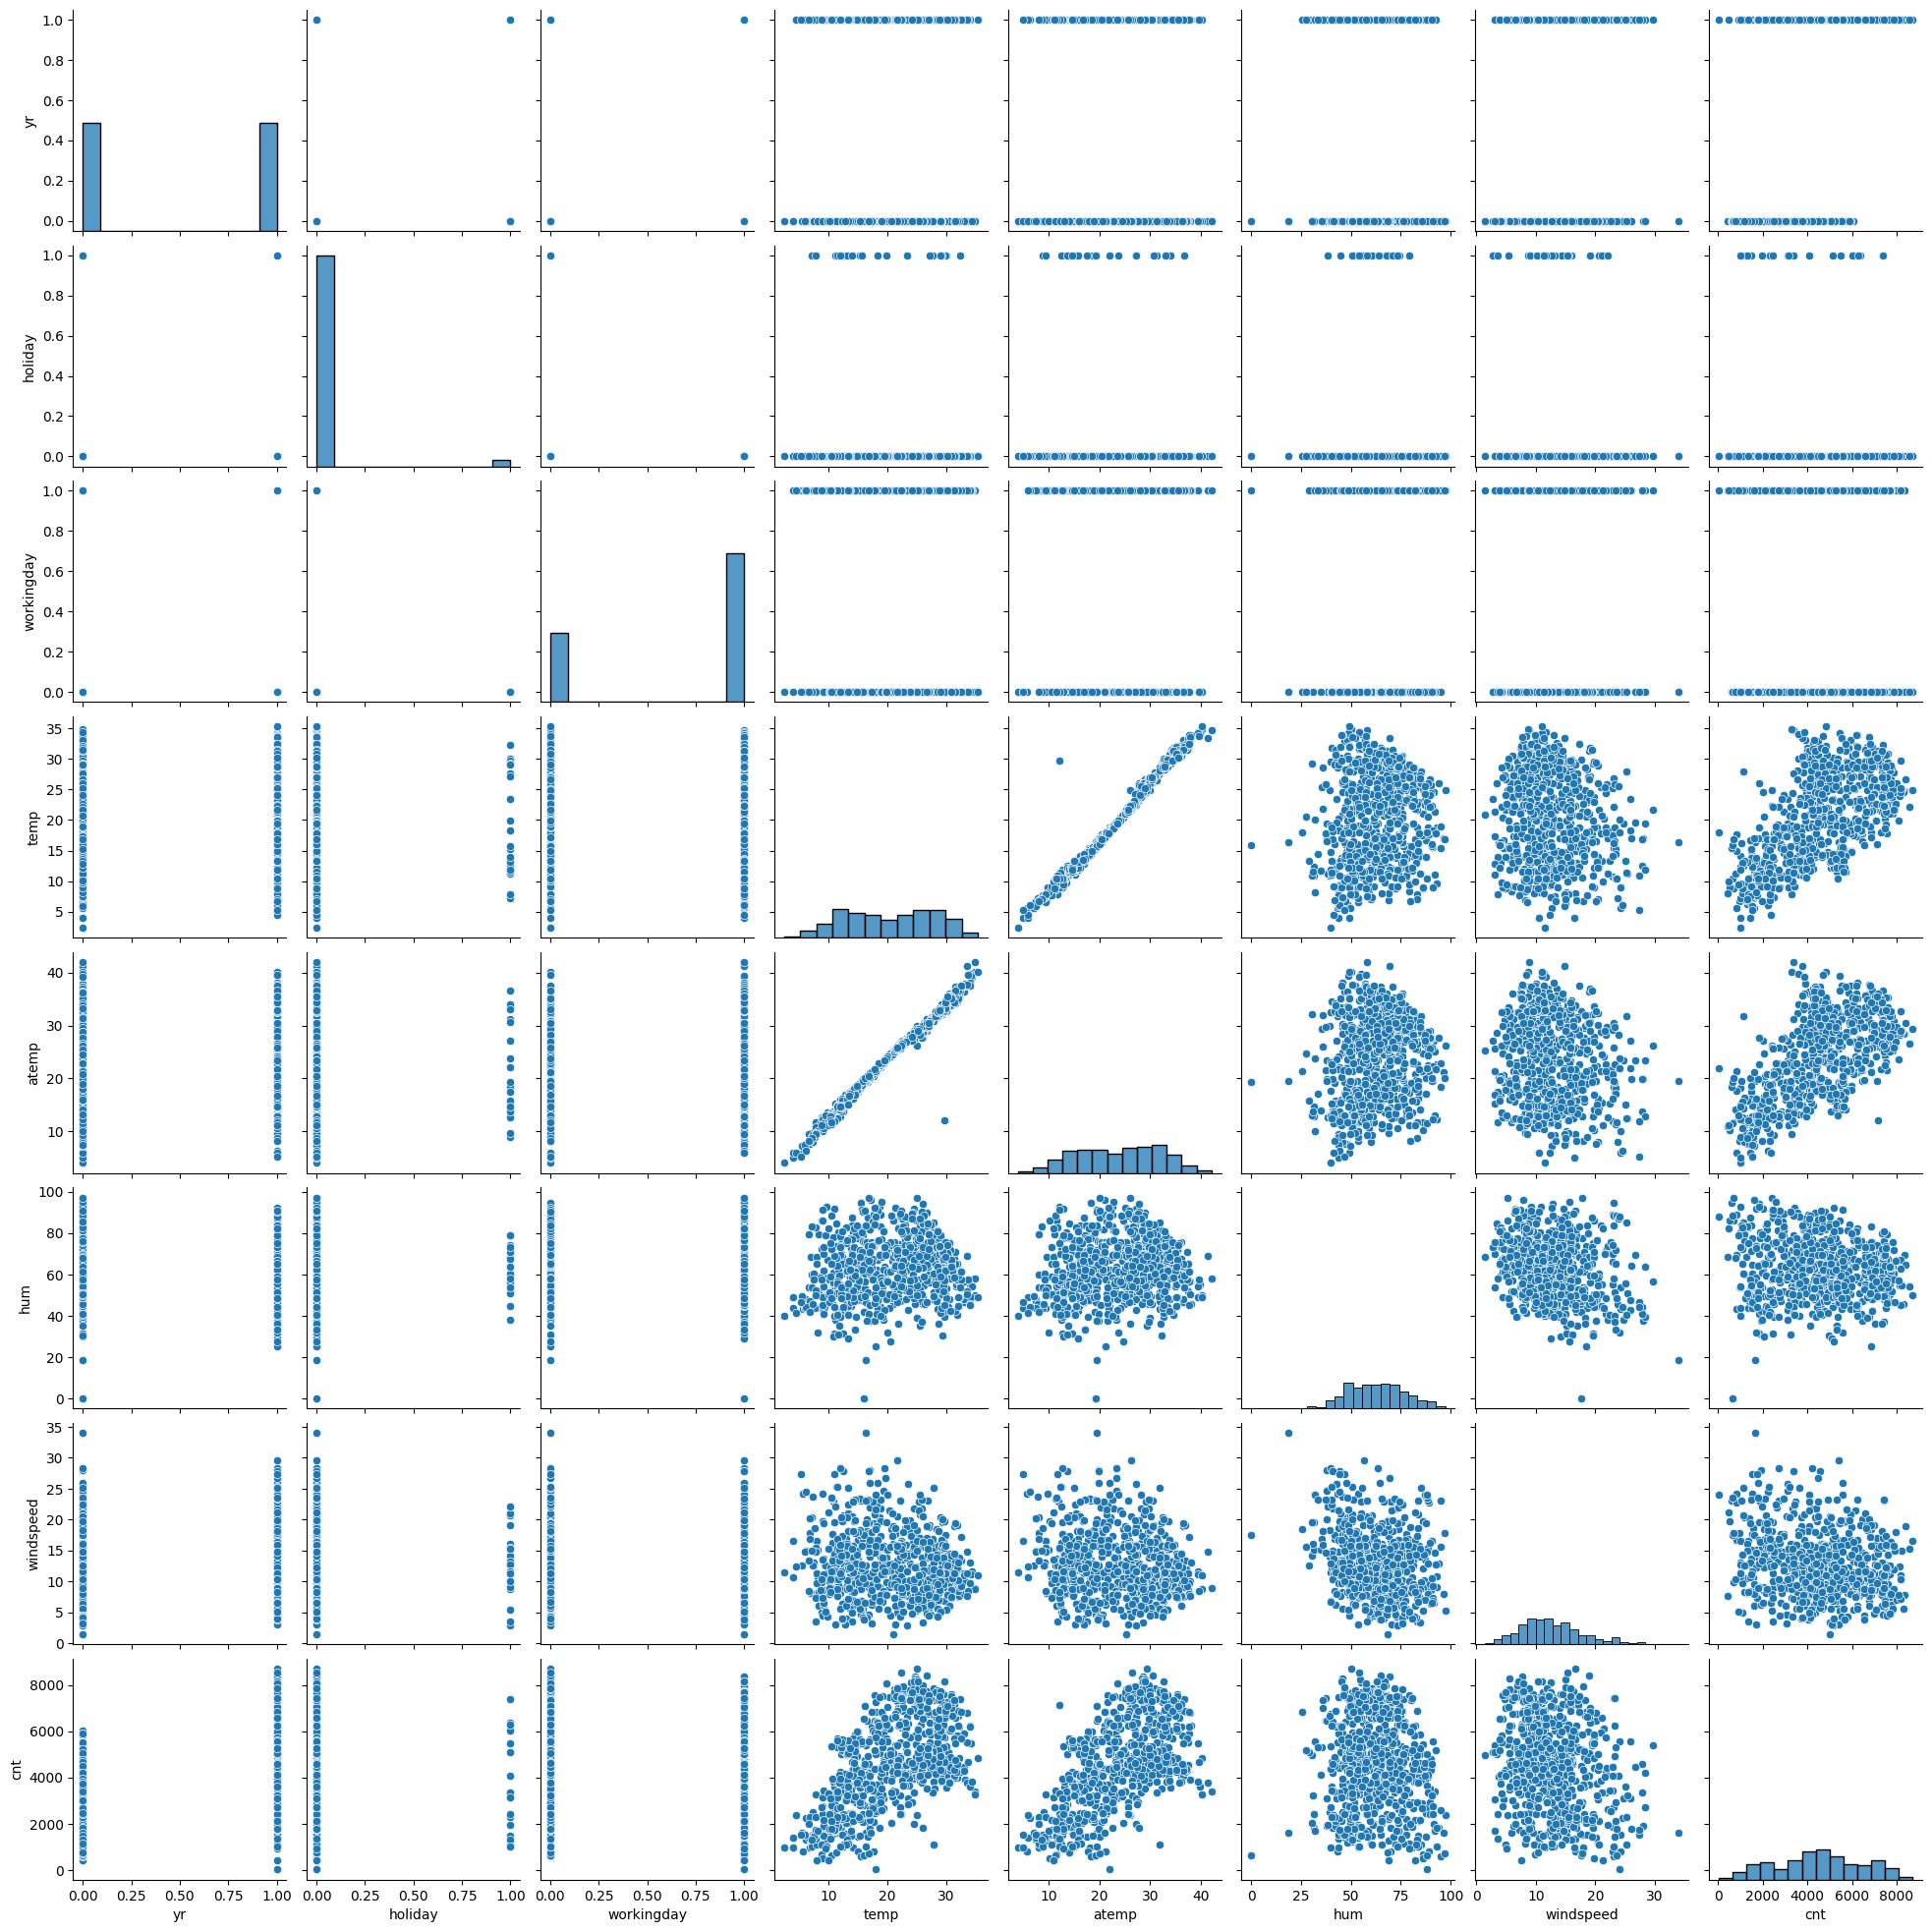

In [315]:
plt.figure(figsize=(20,15))
sns.pairplot(bikes_df)
plt.show()

**Observation:**
* **Temp and atemp** have a **strong linear relationship**, indicating **redundancy**.

* **Cnt has a positive correlation with temp and atemp.** This indicates that warmer weather conditions favor more bike rentals.

* **Humidity** shows a **slight negative correlation with cnt**, suggesting that people might prefer to rent bikes in less humid conditions.

* No strong correlations between cnt and other meteorological variables (windspeed), implying other factors might influence bike rentals more significantly.

# **Multivariate Analysis:**

In [316]:
bikes_df_num=bikes_df[num_cols]

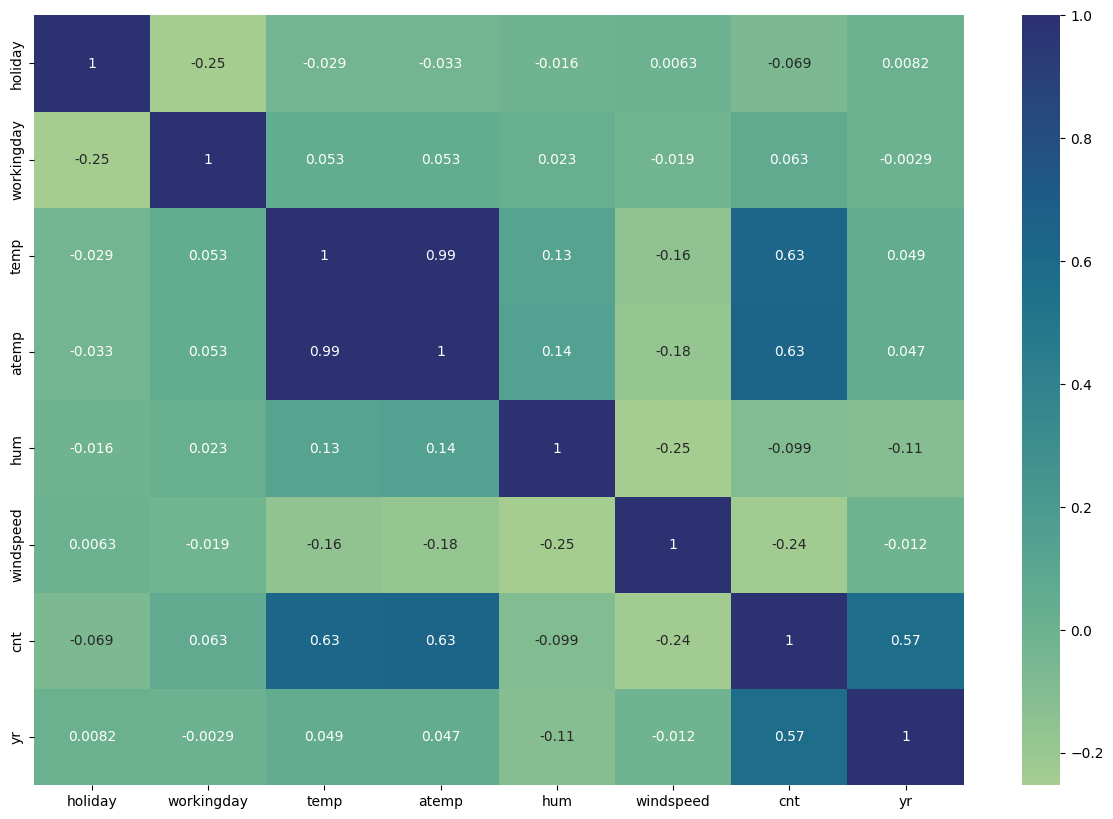

In [317]:
plt.figure(figsize=(15,10))
sns.heatmap(bikes_df_num.corr(),cmap="crest",annot=True)
plt.show()

**Observation:**
* Temp and atemp have a strong linear relationship, indicating redundancy.
* Cnt has a positive correlation with temp and atemp.

In [318]:
bikes_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# **Data validation before linear regression**

In [319]:
bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


**Creating Dummy variables**

Create dummies variables where categories are > 2 so we didn't choose year hear

In [320]:
bikes_df=pd.get_dummies(data=bikes_df,drop_first=True)


In [321]:
bikes_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,False,False


In [322]:
bikes_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thrusday',
       'weekday_tuesday', 'weekday_wednesday', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

**Converting the newly dummy variable to int**

Note: This will help us to perform analysis

In [323]:
bool_columns = bikes_df.select_dtypes(include='bool').columns.tolist()

In [324]:
bikes_df[bool_columns] = bikes_df[bool_columns].astype(int)

In [325]:
bikes_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [326]:
bikes_df.shape

(730, 30)

In [327]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Spring               730 non-null    int64  
 9   season_Summer               730 non-null    int64  
 10  season_Winter               730 non-null    int64  
 11  mnth_Aug                    730 non-null    int64  
 12  mnth_Dec                    730 non-null    int64  
 13  mnth_Feb                    730 non

In [328]:
bikes_df.nunique()

yr                              2
holiday                         2
workingday                      2
temp                          498
atemp                         689
hum                           594
windspeed                     649
cnt                           695
season_Spring                   2
season_Summer                   2
season_Winter                   2
mnth_Aug                        2
mnth_Dec                        2
mnth_Feb                        2
mnth_Jan                        2
mnth_Jul                        2
mnth_Jun                        2
mnth_Mar                        2
mnth_May                        2
mnth_Nov                        2
mnth_Oct                        2
mnth_Sep                        2
weekday_monday                  2
weekday_saturday                2
weekday_sunday                  2
weekday_thrusday                2
weekday_tuesday                 2
weekday_wednesday               2
weathersit_Light_Snow_Rain      2
weathersit_Mis

# **Correlation Metrics**

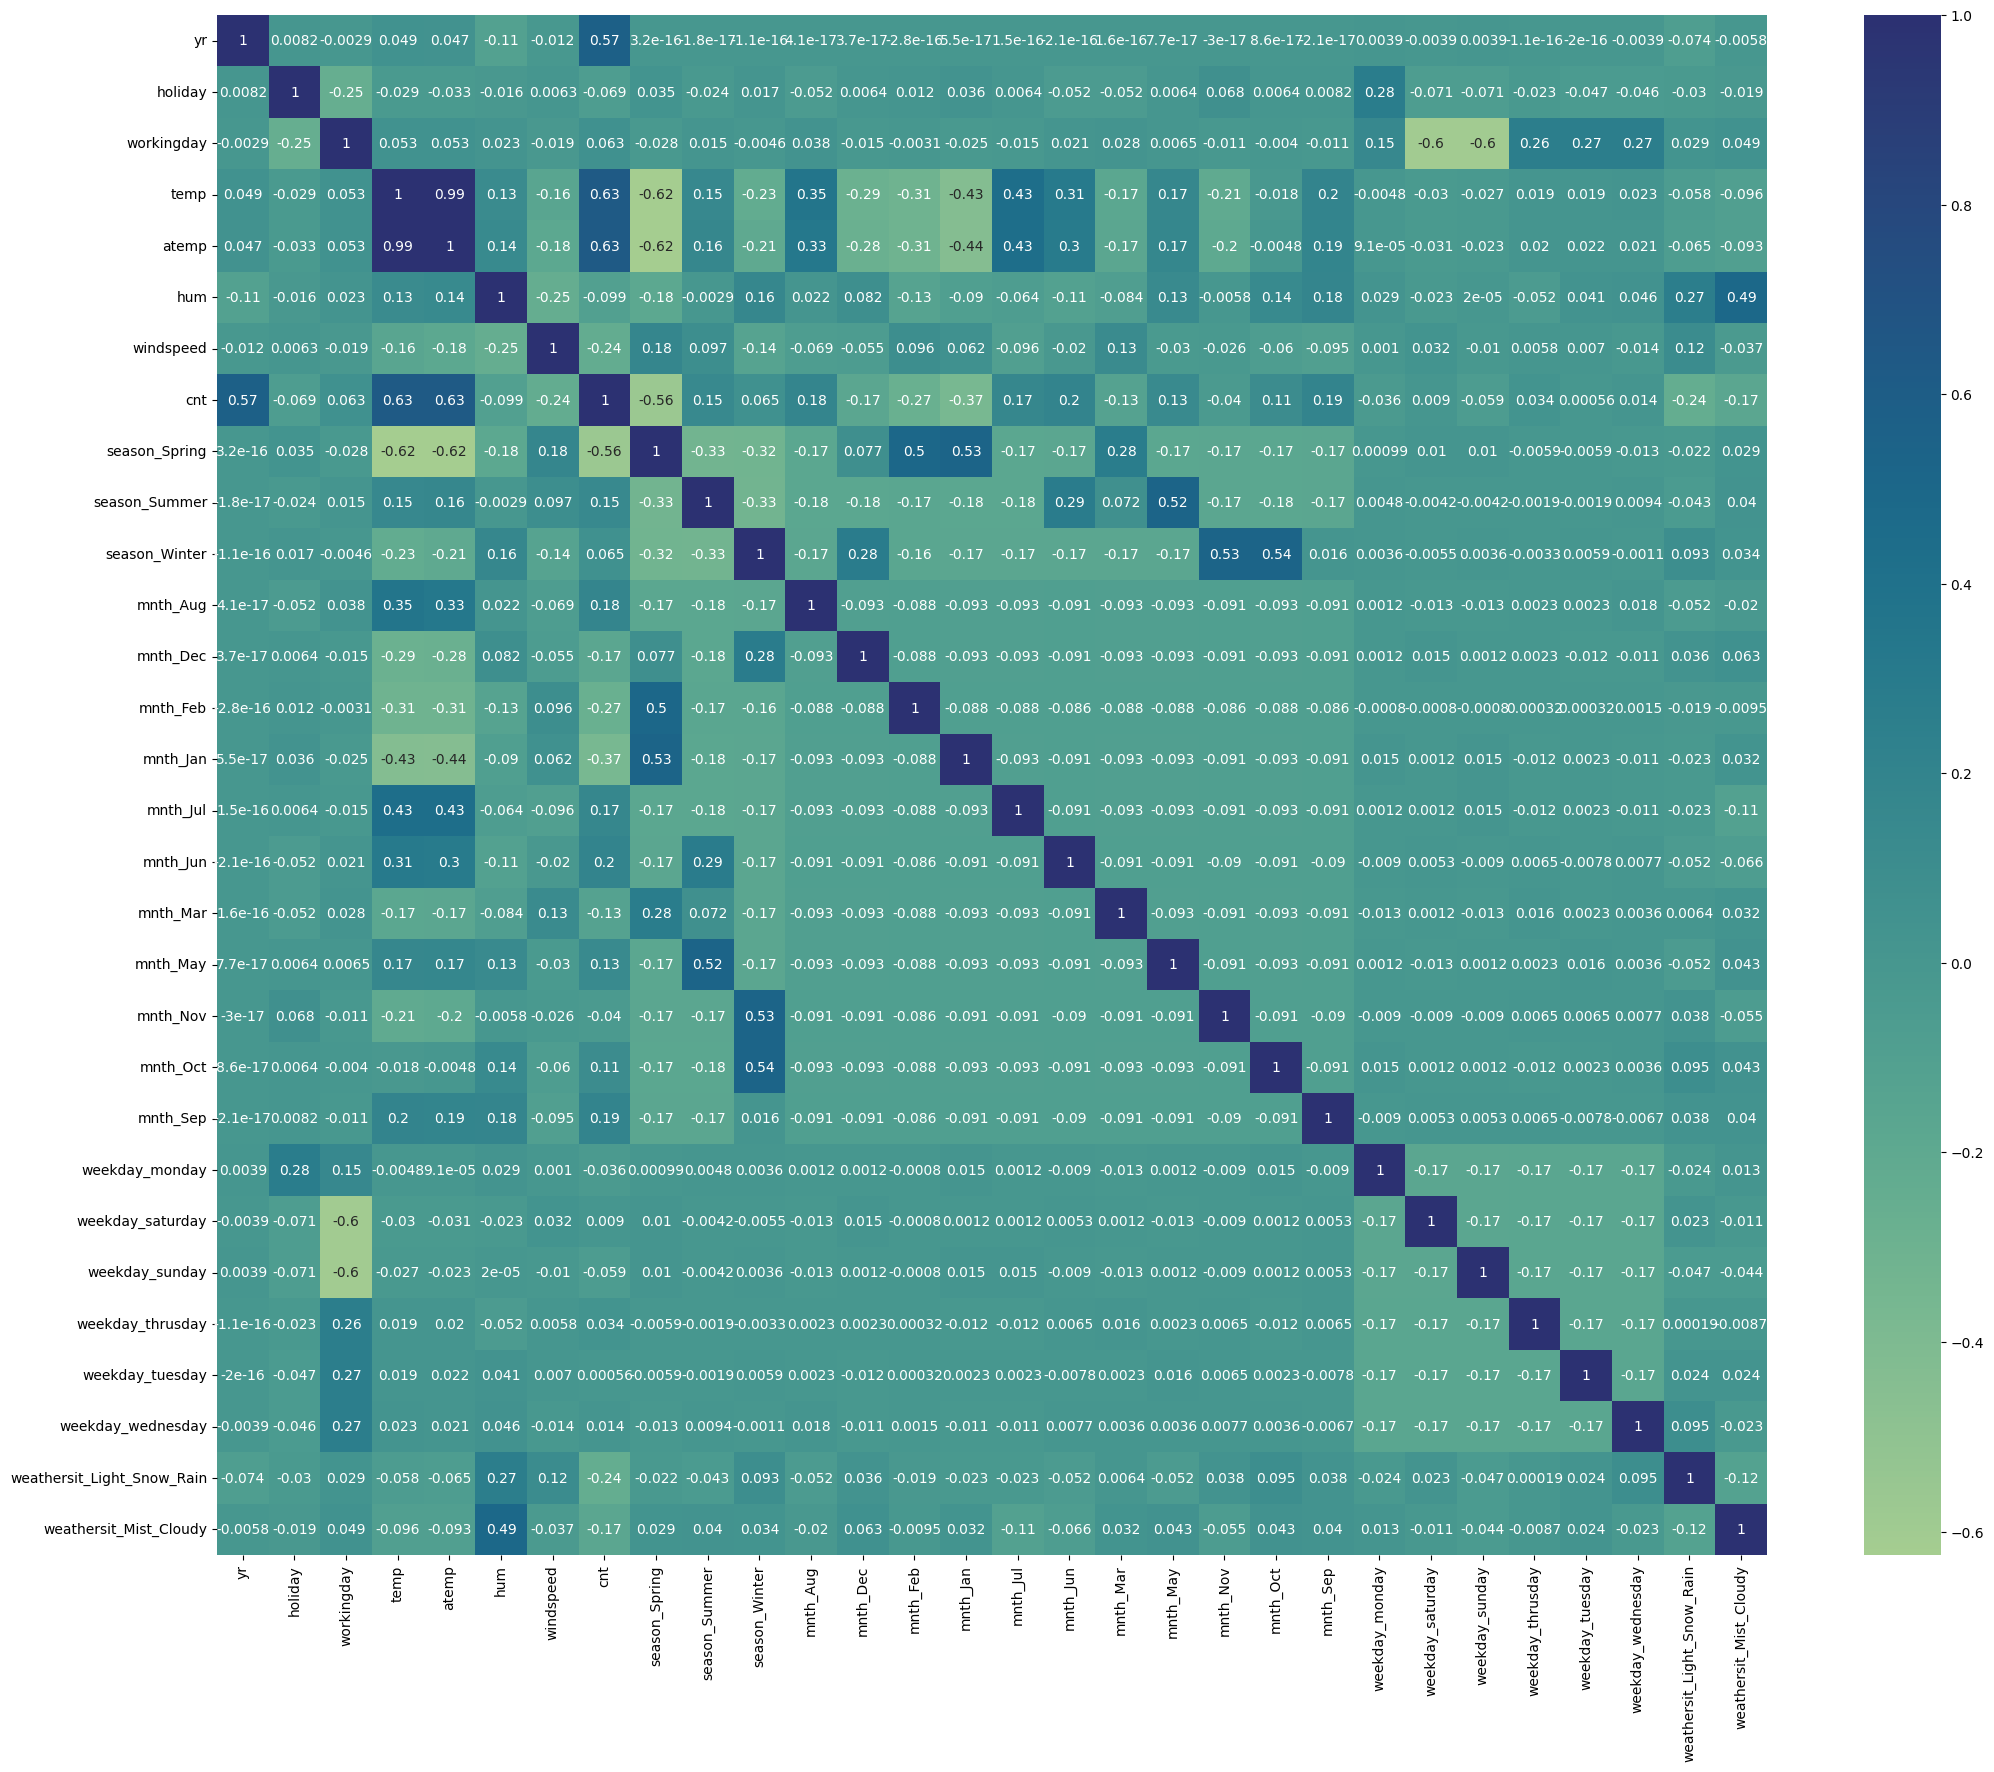

In [329]:
plt.figure(figsize = (25,20))
sns.heatmap(bikes_df.corr(), annot = True, cmap="crest")
plt.show()

# **Data Preparation For Model**

**Train and Test Split**

*Splitting data frame in train and test splitting it 80/20*

In [330]:
np.random.seed(0)
df_train, df_test = train_test_split(bikes_df, train_size = 0.8, random_state = 100)

In [331]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
367,1,0,1,6.150000,6.31375,44.1250,24.499957,2236,1,0,...,0,0,0,0,0,0,1,0,0,0
648,1,0,1,17.835000,21.55835,46.3333,12.166932,7570,0,0,...,1,0,0,0,0,1,0,0,0,0
44,0,0,1,17.015000,19.91750,37.5833,27.999836,1913,1,0,...,0,0,1,0,0,0,0,0,0,0
705,1,0,1,13.154153,16.09790,76.4167,8.750200,5008,0,0,...,0,0,0,0,0,0,0,0,0,1
379,1,0,0,6.833347,8.08125,41.9167,16.834286,2311,1,0,...,0,0,0,0,1,0,0,0,0,0


Checking the size of train dataframe

In [332]:
df_train.shape

(584, 30)

In [333]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


In [334]:
df_test.shape

(146, 30)

**Scalling**


We are using MinMax scaller for all the continous variables

In [335]:
scaler = MinMaxScaler()

In [336]:
# We are taking only continous variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [337]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,1,0,...,0,0,0,0,0,0,1,0,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,...,1,0,0,0,0,1,0,0,0,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,1,0,...,0,0,1,0,0,0,0,0,0,0
705,1,0,1,0.326094,0.318824,0.787463,0.189819,0.573631,0,0,...,0,0,0,0,0,0,0,0,0,1
379,1,0,0,0.133996,0.108365,0.431945,0.449210,0.263346,1,0,...,0,0,0,0,1,0,0,0,0,0


In [338]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.537414,0.513175,0.649499,0.319463,0.515792,0.251712,0.246575,...,0.092466,0.080479,0.148973,0.150685,0.154110,0.135274,0.133562,0.154110,0.027397,0.342466
std,0.500241,0.163378,0.471403,0.225336,0.211663,0.144219,0.168114,0.225336,0.434369,0.431387,...,0.289931,0.272267,0.356367,0.358048,0.361363,0.342309,0.340472,0.361363,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.522837,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.691872,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Building Models**

We are using Sci-Kits's liner_model to create LinearRegression

Since cnt is target variable, we are keeping it as y and other features as X

In [339]:
y_train = df_train.pop('cnt')
X_train = df_train

Fitting the LR model with train data

In [340]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

Using RFE to select the top features for the models. REF required Sci-Kit's feature selection

In [341]:
# We choose the 15 columns arbitarty
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [342]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 3),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 9),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', False, 2),
 ('weekday_monday', False, 7),
 ('weekday_saturday', True, 1),
 ('weekday_sunday', False, 6),
 ('weekday_thrusday', False, 13),
 ('weekday_tuesday', False, 8),
 ('weekday_wednesday', False, 14),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

Feature selected by RFE

In [343]:
col=X_train.columns[rfe.support_]

In [344]:
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'weekday_saturday', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

Feature not selected by RFE

In [345]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_Summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'mnth_Sep', 'weekday_monday',
       'weekday_sunday', 'weekday_thrusday', 'weekday_tuesday',
       'weekday_wednesday'],
      dtype='object')

In [346]:
X_train.columns[rfe.support_].shape

(15,)

**We could use Recursive Feature Elimination (RFE) to proceed with minimal model creation. However, we are avoiding this approach because manually filtering the dataset provides a deeper understanding, aiding in better model selection.**

**The general way to interpret the VIF value is as follows.**

* VIF > 10, then we should definitely eliminate the variable.
* VIF > 5, We need to inspect the variable before eliminating it.
* VIF < 5, is definitely a good variable and we should not eliminate it.
In feature selection, there are multiple combinations possible.

 * High p-value and high VIF.

 * Low p-value and low VIF.

 * High — Low combination.

   * High p-value and low VIF.

   * Low p-value and High VIF.

When we have a high p-value and high VIF of any variable we should drop that variable. When there is a low p-value and low VIF that variable is very good and we should keep that variable in our model.

Now, we have a combination of High — Low Combination. In feature elimination, we should first eliminate the variable which has a high p-value and low VIF. After dropping all the variables with a high p-value and low VIF combination we should drop the variable which has a low p-value and high VIF.

**Model 1**


Creating LR with train data since it must be in the **y = B0 + B1 * X** . we must **add constant** and for that we use the sm model

In [347]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     120.3
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          3.26e-215
Time:                        21:23:04   Log-Likelihood:                 613.26
No. Observations:                 584   AIC:                            -1169.
Df Residuals:                     555   BIC:                            -1042.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

To detect multicollinearity in regression models validating the VIF, It's a repeatative process we will do it many time, we could create function instead and use it, however it is handy and easy to understand

In [348]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features    VIF
2                   workingday  88.20
3                         temp  71.81
4                        atemp  61.58
23              weekday_sunday  20.33
22            weekday_saturday  19.90
7                season_Spring  10.84
9                season_Winter   8.86
8                season_Summer   8.33
19                    mnth_Oct   6.84
18                    mnth_Nov   6.39
10                    mnth_Aug   6.15
13                    mnth_Jan   6.05
11                    mnth_Dec   5.83
14                    mnth_Jul   5.55
20                    mnth_Sep   4.92
1                      holiday   4.91
12                    mnth_Feb   4.86
16                    mnth_Mar   3.50
15                    mnth_Jun   2.80
17                    mnth_May   2.29
5                          hum   2.10
21              weekday_monday   1.99
26           weekday_wednesday   1.95
24            weekday_thrusday   1.86
25             weekday_tuesday   1.84
28      weat

**Observation:**

* **R2**: 85
* **R2-Adj**: 85
* **P-Value**: Multiple variables has high P-Value however the **mnth_Mar** is the highest one
* **VIF**: Workingday has the highest VIF, however the P-value is less

**Action:**
We will remove "mnth_Mar"

**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit


**Model2:**

In [349]:
X_train.drop('mnth_Mar',axis='columns', inplace=True)

In [350]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.91e-216
Time:                        21:23:05   Log-Likelihood:                 613.26
No. Observations:                 584   AIC:                            -1171.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [351]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features    VIF
2                   workingday  76.79
3                         temp  71.76
4                        atemp  61.53
22              weekday_sunday  17.85
21            weekday_saturday  17.24
7                season_Spring   9.68
9                season_Winter   8.50
8                season_Summer   7.93
10                    mnth_Aug   5.39
14                    mnth_Jul   4.97
18                    mnth_Oct   4.80
1                      holiday   4.47
17                    mnth_Nov   4.44
19                    mnth_Sep   3.94
11                    mnth_Dec   3.25
13                    mnth_Jan   2.63
15                    mnth_Jun   2.50
12                    mnth_Feb   2.12
5                          hum   2.09
16                    mnth_May   2.02
20              weekday_monday   1.99
25           weekday_wednesday   1.95
23            weekday_thrusday   1.86
24             weekday_tuesday   1.84
27      weathersit_Mist_Cloudy   1.62
26  weathers

**Observation:**

* **R2**: 85
* **R2-Adj**: 85
* **P-Value**: Multiple variables has high P-Value however the **mnth_Oct** is the highest one
* **VIF**: Workingday has the highest VIF, however the P-value is less

**Action:**
We will remove "mnth_Oct"

**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit


**Model3:**

In [352]:
X_train.drop('mnth_Oct',axis='columns', inplace=True)

In [353]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     130.0
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.74e-217
Time:                        21:23:05   Log-Likelihood:                 613.17
No. Observations:                 584   AIC:                            -1172.
Df Residuals:                     557   BIC:                            -1054.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [354]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features    VIF
2                   workingday  73.70
3                         temp  71.71
4                        atemp  61.52
21              weekday_sunday  17.07
20            weekday_saturday  16.52
7                season_Spring   9.30
9                season_Winter   6.81
8                season_Summer   6.70
10                    mnth_Aug   4.52
1                      holiday   4.26
14                    mnth_Jul   4.23
18                    mnth_Sep   2.75
13                    mnth_Jan   2.48
15                    mnth_Jun   2.35
5                          hum   2.08
19              weekday_monday   1.99
16                    mnth_May   1.99
12                    mnth_Feb   1.98
24           weekday_wednesday   1.95
22            weekday_thrusday   1.86
23             weekday_tuesday   1.84
17                    mnth_Nov   1.77
11                    mnth_Dec   1.72
26      weathersit_Mist_Cloudy   1.62
25  weathersit_Light_Snow_Rain   1.30
6           

**Observation:**

* **R2**: 85
* **R2-Adj**: 85
* **P-Value**: Multiple variables has high P-Value however the **mnth_Jun** is the highest one
* **VIF**: Workingday has the highest VIF, however the P-value is less

**Action:**
We will remove "mnth_Jun"

**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

**Model4:**

In [355]:
X_train.drop('mnth_Jun',axis='columns', inplace=True)

In [356]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     135.4
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.49e-218
Time:                        21:23:05   Log-Likelihood:                 613.10
No. Observations:                 584   AIC:                            -1174.
Df Residuals:                     558   BIC:                            -1061.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [357]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features    VIF
2                   workingday  73.55
3                         temp  65.99
4                        atemp  60.51
20              weekday_sunday  17.01
19            weekday_saturday  16.46
7                season_Spring   8.78
8                season_Summer   6.61
9                season_Winter   6.10
1                      holiday   4.26
10                    mnth_Aug   3.10
14                    mnth_Jul   2.81
13                    mnth_Jan   2.37
17                    mnth_Sep   2.15
5                          hum   2.03
18              weekday_monday   1.99
23           weekday_wednesday   1.95
12                    mnth_Feb   1.94
21            weekday_thrusday   1.86
22             weekday_tuesday   1.84
16                    mnth_Nov   1.75
11                    mnth_Dec   1.68
25      weathersit_Mist_Cloudy   1.62
15                    mnth_May   1.54
24  weathersit_Light_Snow_Rain   1.30
6                    windspeed   1.26
0           

**Observation:**

* **R2**: 85
* **R2-Adj**: 85
* **P-Value**: Multiple variables has high P-Value however the **mnth_Aug** is the highest one
* **VIF**: Workingday has the highest VIF, however the P-value is less

**Action:**
We will remove "mnth_Aug"

**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

**Model5:**

In [358]:
X_train.drop('mnth_Aug',axis='columns', inplace=True)

In [359]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     141.3
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.18e-219
Time:                        21:23:06   Log-Likelihood:                 613.05
No. Observations:                 584   AIC:                            -1176.
Df Residuals:                     559   BIC:                            -1067.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [360]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features    VIF
2                   workingday  65.94
3                         temp  65.45
4                        atemp  60.20
19              weekday_sunday  15.32
18            weekday_saturday  14.80
7                season_Spring   6.11
1                      holiday   3.97
9                season_Winter   3.80
8                season_Summer   3.59
12                    mnth_Jan   2.37
5                          hum   2.03
17              weekday_monday   1.99
22           weekday_wednesday   1.95
11                    mnth_Feb   1.94
20            weekday_thrusday   1.85
21             weekday_tuesday   1.84
15                    mnth_Nov   1.74
10                    mnth_Dec   1.67
24      weathersit_Mist_Cloudy   1.62
14                    mnth_May   1.54
13                    mnth_Jul   1.53
16                    mnth_Sep   1.34
23  weathersit_Light_Snow_Rain   1.29
6                    windspeed   1.26
0                           yr   1.04


**Observation:**

* **R2**: 85
* **R2-Adj**: 85
* **P-Value**: Multiple variables has high P-Value however the **atemp** is the highest one
* **VIF**: Workingday has the highest VIF, however the P-value is less

**Action:**
We will remove "atemp"

**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

**Model6:**

In [361]:
X_train.drop('atemp',axis='columns', inplace=True)

In [362]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.95e-220
Time:                        21:23:06   Log-Likelihood:                 612.94
No. Observations:                 584   AIC:                            -1178.
Df Residuals:                     560   BIC:                            -1073.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [363]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features    VIF
2                   workingday  65.79
18              weekday_sunday  15.31
17            weekday_saturday  14.79
6                season_Spring   6.00
3                         temp   4.89
1                      holiday   3.95
8                season_Winter   3.67
7                season_Summer   3.47
11                    mnth_Jan   2.36
4                          hum   2.02
16              weekday_monday   1.97
21           weekday_wednesday   1.94
10                    mnth_Feb   1.94
19            weekday_thrusday   1.84
20             weekday_tuesday   1.82
14                    mnth_Nov   1.74
9                     mnth_Dec   1.67
23      weathersit_Mist_Cloudy   1.62
13                    mnth_May   1.54
12                    mnth_Jul   1.52
15                    mnth_Sep   1.33
22  weathersit_Light_Snow_Rain   1.28
5                    windspeed   1.21
0                           yr   1.04


**Observation:**

* **R2**: 85
* **R2-Adj**: 85
* **P-Value**: Multiple variables has high P-Value however the **holiday** is the highest one
* **VIF**: Workingday has the highest VIF, however the P-value is less

**Action:**
We will remove "holiday"

**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

**Model7:**

In [364]:
X_train.drop('holiday',axis='columns', inplace=True)

In [365]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.95e-220
Time:                        21:23:06   Log-Likelihood:                 612.94
No. Observations:                 584   AIC:                            -1178.
Df Residuals:                     560   BIC:                            -1073.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [366]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features    VIF
3                          hum  36.54
2                         temp  22.94
1                   workingday  18.93
5                season_Spring   6.31
17              weekday_sunday   5.81
16            weekday_saturday   5.63
4                    windspeed   5.08
7                season_Winter   4.20
6                season_Summer   3.77
10                    mnth_Jan   2.43
22      weathersit_Mist_Cloudy   2.40
20           weekday_wednesday   2.25
15              weekday_monday   2.17
0                           yr   2.14
18            weekday_thrusday   2.07
19             weekday_tuesday   2.07
9                     mnth_Feb   2.04
13                    mnth_Nov   1.76
8                     mnth_Dec   1.71
12                    mnth_May   1.63
11                    mnth_Jul   1.63
14                    mnth_Sep   1.41
21  weathersit_Light_Snow_Rain   1.29


**Observation:**

* **R2**: 85
* **R2-Adj**: 85
* **P-Value**: Multiple variables has high P-Value however the **weekday_wednesday ** is the highest one
* **VIF**: hum has the highest VIF, however the P-value is less
Change in VIF noticed

**Action:**
We will remove "weekday_wednesday "

**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

**Model8:**

In [367]:
X_train.drop('weekday_wednesday',axis='columns', inplace=True)

In [368]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     154.5
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.77e-221
Time:                        21:23:06   Log-Likelihood:                 612.80
No. Observations:                 584   AIC:                            -1180.
Df Residuals:                     561   BIC:                            -1079.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [369]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features    VIF
3                          hum  36.16
2                         temp  22.59
1                   workingday  18.74
5                season_Spring   6.25
17              weekday_sunday   5.44
16            weekday_saturday   5.28
4                    windspeed   5.07
7                season_Winter   4.17
6                season_Summer   3.73
10                    mnth_Jan   2.42
21      weathersit_Mist_Cloudy   2.38
0                           yr   2.14
9                     mnth_Feb   2.04
13                    mnth_Nov   1.75
8                     mnth_Dec   1.71
12                    mnth_May   1.63
11                    mnth_Jul   1.63
15              weekday_monday   1.56
19             weekday_tuesday   1.49
18            weekday_thrusday   1.48
14                    mnth_Sep   1.41
20  weathersit_Light_Snow_Rain   1.29


**Observation:**

* **R2**: 85
* **R2-Adj**: 85
* **P-Value**: Multiple variables has high P-Value however the **weekday_thrusday ** is the highest one
* **VIF**: hum has the highest VIF, however the P-value is less


**Action:**
We will remove "weekday_thrusday "

**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

**Model9:**

In [370]:
X_train.drop('weekday_thrusday',axis='columns', inplace=True)

In [371]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     162.1
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.55e-222
Time:                        21:23:07   Log-Likelihood:                 612.68
No. Observations:                 584   AIC:                            -1181.
Df Residuals:                     562   BIC:                            -1085.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [372]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features    VIF
3                          hum  36.14
2                         temp  22.45
1                   workingday  18.68
5                season_Spring   6.21
17              weekday_sunday   5.34
16            weekday_saturday   5.19
4                    windspeed   5.07
7                season_Winter   4.17
6                season_Summer   3.71
10                    mnth_Jan   2.42
20      weathersit_Mist_Cloudy   2.38
0                           yr   2.13
9                     mnth_Feb   2.04
13                    mnth_Nov   1.74
8                     mnth_Dec   1.71
11                    mnth_Jul   1.63
12                    mnth_May   1.63
14                    mnth_Sep   1.41
15              weekday_monday   1.40
18             weekday_tuesday   1.34
19  weathersit_Light_Snow_Rain   1.29


**Observation:**

* **R2**: 85
* **R2-Adj**: 85
* **P-Value**: Multiple variables has high P-Value however the **mnth_May** is the highest one
* **VIF**: hum has the highest VIF, however the P-value is less


**Action:**
We will remove "mnth_May "

**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

**Model10:**


In [373]:
X_train.drop('mnth_May',axis='columns', inplace=True)

In [374]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     170.2
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.71e-223
Time:                        21:23:07   Log-Likelihood:                 612.29
No. Observations:                 584   AIC:                            -1183.
Df Residuals:                     563   BIC:                            -1091.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [375]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features    VIF
3                          hum  35.97
2                         temp  22.27
1                   workingday  18.48
5                season_Spring   6.19
16              weekday_sunday   5.28
15            weekday_saturday   5.11
4                    windspeed   5.01
7                season_Winter   4.16
6                season_Summer   3.08
10                    mnth_Jan   2.42
19      weathersit_Mist_Cloudy   2.38
0                           yr   2.12
9                     mnth_Feb   2.04
12                    mnth_Nov   1.74
8                     mnth_Dec   1.71
11                    mnth_Jul   1.63
13                    mnth_Sep   1.41
14              weekday_monday   1.40
17             weekday_tuesday   1.34
18  weathersit_Light_Snow_Rain   1.29


**Observation:**

* **R2**: 85
* **R2-Adj**: 85
* **P-Value**: Multiple variables has high P-Value however the **weekday_sunday** is the highest one
* **VIF**: hum has the highest VIF, however the P-value is less


**Action:**
We will remove "weekday_sunday"

**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

**Model11:**

In [376]:
X_train.drop('weekday_sunday',axis='columns', inplace=True)

In [377]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     178.8
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          3.18e-224
Time:                        21:23:07   Log-Likelihood:                 611.32
No. Observations:                 584   AIC:                            -1183.
Df Residuals:                     564   BIC:                            -1095.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [378]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features    VIF
3                          hum  32.17
2                         temp  19.69
5                season_Spring   5.70
1                   workingday   4.85
4                    windspeed   4.79
7                season_Winter   3.87
6                season_Summer   2.85
10                    mnth_Jan   2.39
18      weathersit_Mist_Cloudy   2.34
0                           yr   2.12
9                     mnth_Feb   2.03
15            weekday_saturday   1.80
12                    mnth_Nov   1.74
8                     mnth_Dec   1.70
11                    mnth_Jul   1.62
13                    mnth_Sep   1.41
16             weekday_tuesday   1.32
14              weekday_monday   1.30
17  weathersit_Light_Snow_Rain   1.27


**Observation:**

* **R2**: 85
* **R2-Adj**: 85
* **P-Value**: Multiple variables has high P-Value however the **weekday_tuesday** is the highest one
* **VIF**: hum has the highest VIF, however the P-value is less


**Action:**
We will remove "weekday_tuesday"

**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

**Model12:**

In [379]:
X_train.drop('weekday_tuesday',axis='columns', inplace=True)

In [380]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     188.1
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          8.71e-225
Time:                        21:23:07   Log-Likelihood:                 609.93
No. Observations:                 584   AIC:                            -1182.
Df Residuals:                     565   BIC:                            -1099.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [381]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features    VIF
3                          hum  32.12
2                         temp  19.67
5                season_Spring   5.70
4                    windspeed   4.79
1                   workingday   4.57
7                season_Winter   3.86
6                season_Summer   2.85
10                    mnth_Jan   2.39
17      weathersit_Mist_Cloudy   2.34
0                           yr   2.12
9                     mnth_Feb   2.03
15            weekday_saturday   1.80
12                    mnth_Nov   1.74
8                     mnth_Dec   1.70
11                    mnth_Jul   1.62
13                    mnth_Sep   1.41
16  weathersit_Light_Snow_Rain   1.27
14              weekday_monday   1.23


**Observation:**

* **R2**: 85
* **R2-Adj**: 85
* **P-Value**: Multiple variables has high P-Value however the **mnth_Feb** is the highest one
* **VIF**: hum has the highest VIF, however the P-value is less


**Action:**
We will remove "mnth_Feb"

**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

**Model13:**

In [382]:
X_train.drop('mnth_Feb',axis='columns', inplace=True)

In [383]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     198.2
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.82e-225
Time:                        21:23:07   Log-Likelihood:                 608.34
No. Observations:                 584   AIC:                            -1181.
Df Residuals:                     566   BIC:                            -1102.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [384]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features    VIF
3                          hum  31.47
2                         temp  19.07
4                    windspeed   4.78
1                   workingday   4.56
5                season_Spring   4.53
7                season_Winter   3.86
6                season_Summer   2.85
16      weathersit_Mist_Cloudy   2.34
0                           yr   2.11
14            weekday_saturday   1.80
9                     mnth_Jan   1.71
11                    mnth_Nov   1.71
10                    mnth_Jul   1.61
8                     mnth_Dec   1.53
12                    mnth_Sep   1.41
15  weathersit_Light_Snow_Rain   1.26
13              weekday_monday   1.23


**Observation:**

* **R2**: 85
* **R2-Adj**: 85
* **P-Value**: Multiple variables has high P-Value however the **weekday_monday** is the highest one
* **VIF**: hum has the highest VIF, however the P-value is less


**Action:**
We will remove "weekday_monday"

**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

**Model14:**

In [385]:
X_train.drop('weekday_monday',axis='columns', inplace=True)

In [386]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     209.4
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.14e-225
Time:                        21:23:08   Log-Likelihood:                 606.49
No. Observations:                 584   AIC:                            -1179.
Df Residuals:                     567   BIC:                            -1105.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [387]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features    VIF
3                          hum  31.42
2                         temp  19.06
4                    windspeed   4.76
5                season_Spring   4.53
1                   workingday   4.51
7                season_Winter   3.86
6                season_Summer   2.85
15      weathersit_Mist_Cloudy   2.34
0                           yr   2.11
13            weekday_saturday   1.78
9                     mnth_Jan   1.71
11                    mnth_Nov   1.71
10                    mnth_Jul   1.61
8                     mnth_Dec   1.53
12                    mnth_Sep   1.41
14  weathersit_Light_Snow_Rain   1.26


**Observation:**

* **R2**: 85
* **R2-Adj**: 85
* **P-Value**: Looks Good
* **VIF**: hum has the highest VIF, however the P-value is less


**Action:**
We will remove "hum"

**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

**Model15:**

In [388]:
X_train.drop('hum',axis='columns', inplace=True)

In [389]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     216.1
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          3.21e-223
Time:                        21:23:08   Log-Likelihood:                 597.86
No. Observations:                 584   AIC:                            -1164.
Df Residuals:                     568   BIC:                            -1094.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [390]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features   VIF
2                         temp  6.94
3                    windspeed  4.71
1                   workingday  4.48
4                season_Spring  3.06
6                season_Winter  2.88
5                season_Summer  2.34
0                           yr  2.09
12            weekday_saturday  1.78
10                    mnth_Nov  1.67
8                     mnth_Jan  1.63
9                     mnth_Jul  1.61
14      weathersit_Mist_Cloudy  1.57
7                     mnth_Dec  1.43
11                    mnth_Sep  1.35
13  weathersit_Light_Snow_Rain  1.08


**Observation:**

* **R2**: 85
* **R2-Adj**: 84
* **P-Value**: Looks Good
* **VIF**: temp has the highest VIF, however the P-value is less
* As above we already concluded that there is a **LINEAR RELATION between 'temp','atemp' and 'cnt'** so we can't remove the **temp**.


**Action:**

We need to verify the highly correlation between "windspeed" and "workingday"

**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

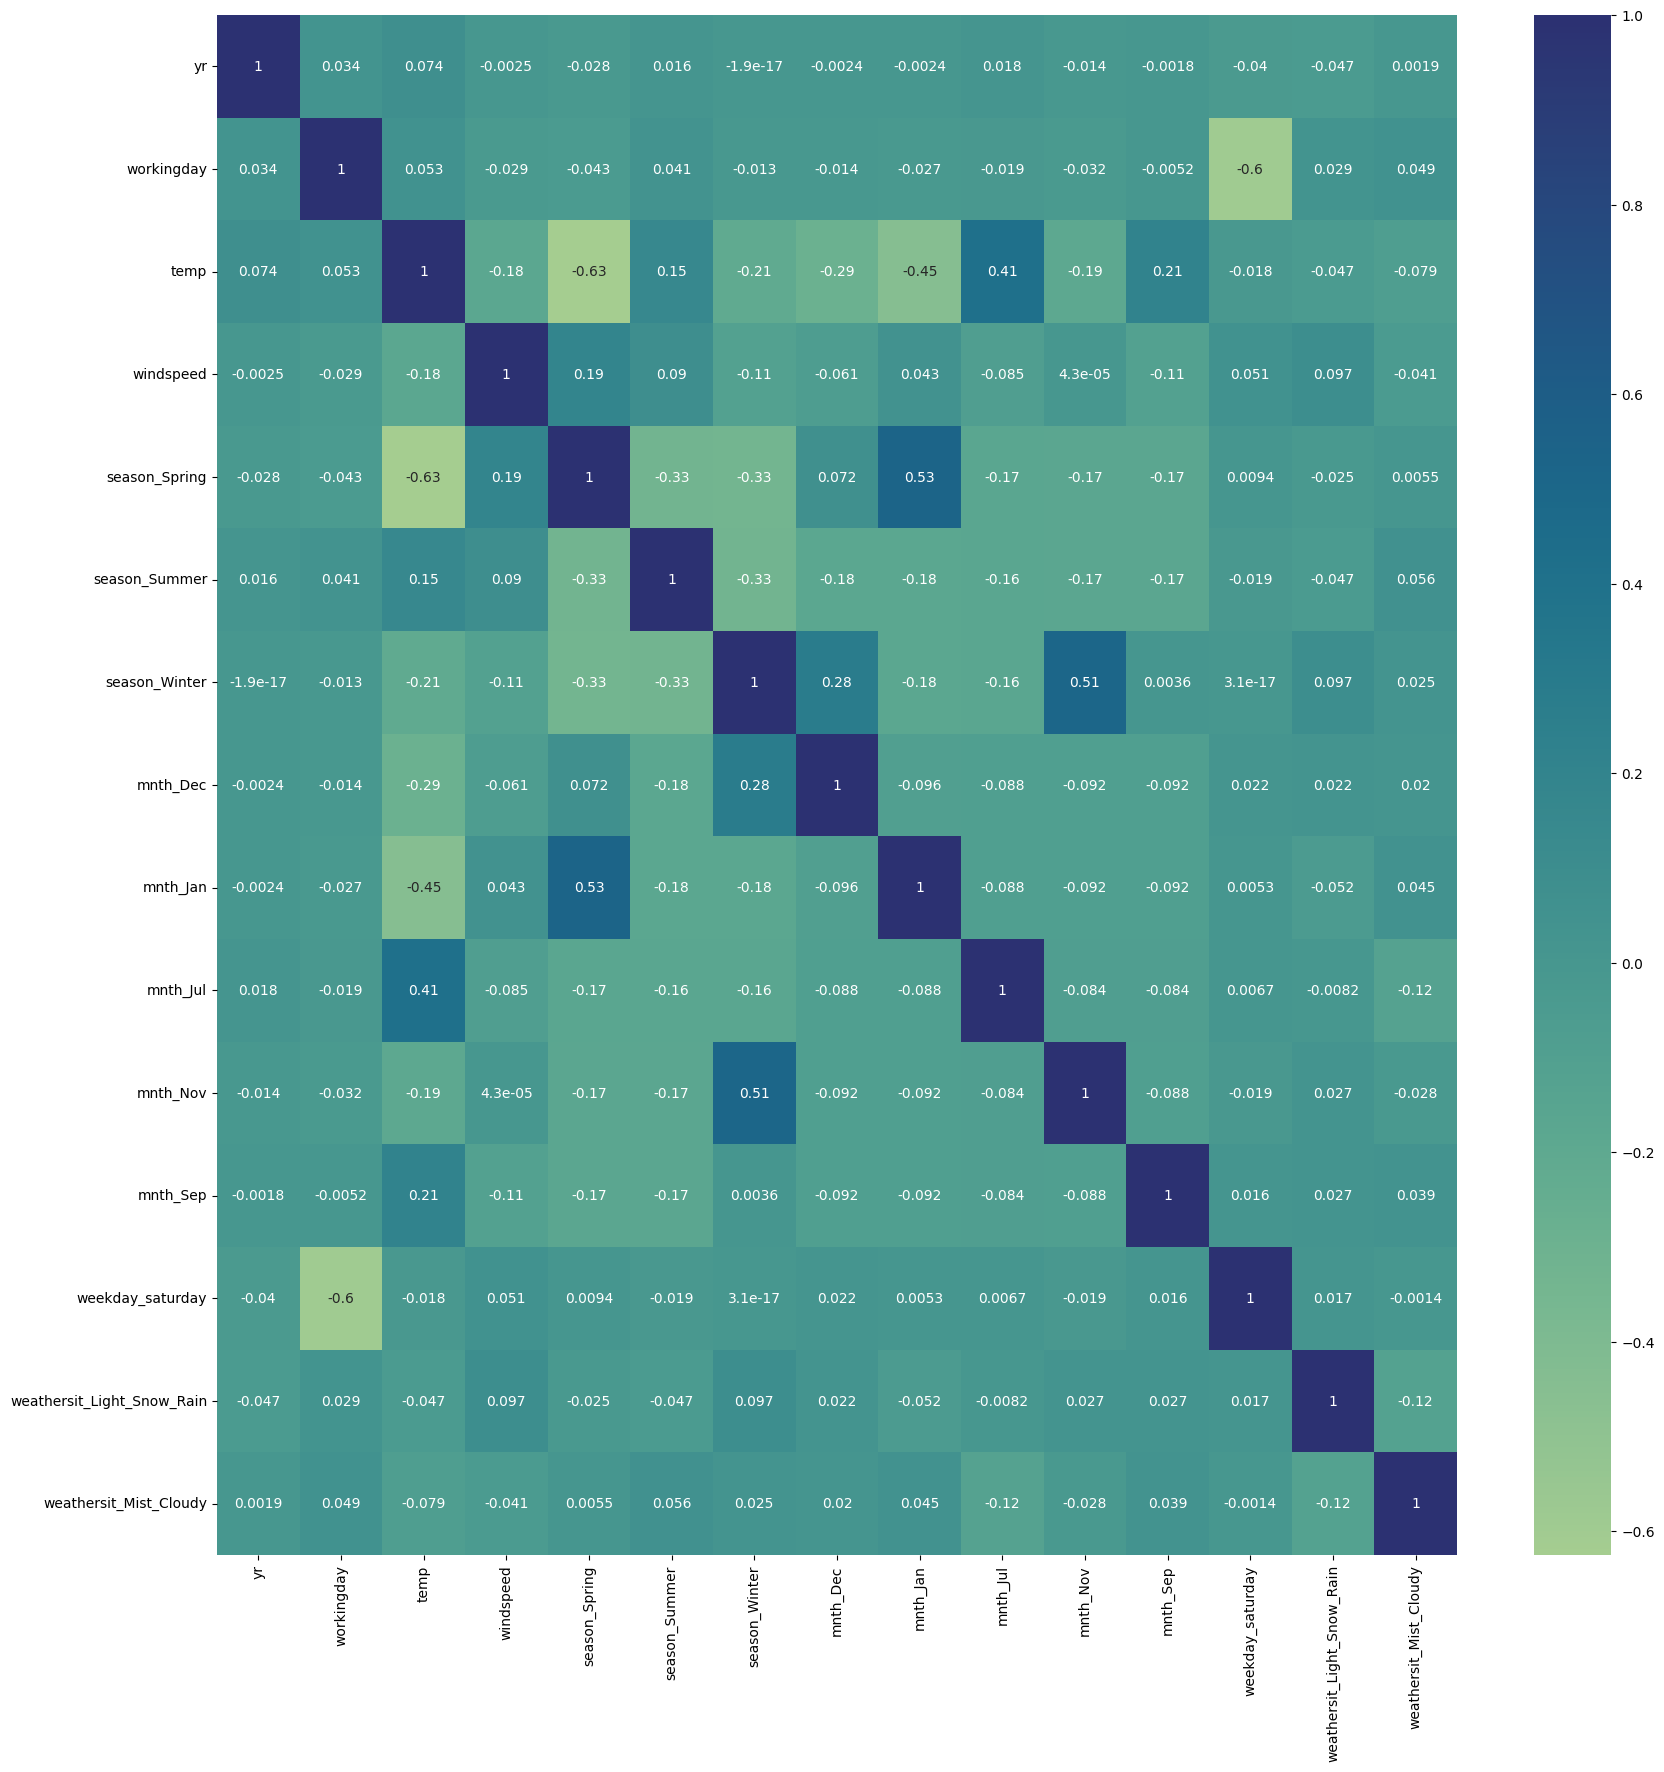

In [391]:
plt.figure(figsize = (20,20))
sns.heatmap(X_train.corr(), annot = True, cmap="crest")
plt.show()

**Observation:**
* **windspeed** has higest correlation between windspeed and workingday

**Action**

* Remove the **windspeed**


**Model15:**

In [392]:
X_train.drop('windspeed',axis='columns', inplace=True)

In [393]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     210.6
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.35e-214
Time:                        21:23:10   Log-Likelihood:                 574.00
No. Observations:                 584   AIC:                            -1118.
Df Residuals:                     569   BIC:                            -1052.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [394]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features   VIF
2                         temp  6.20
1                   workingday  4.44
5                season_Winter  2.78
3                season_Spring  2.41
4                season_Summer  2.12
0                           yr  2.09
11            weekday_saturday  1.76
9                     mnth_Nov  1.65
7                     mnth_Jan  1.63
8                     mnth_Jul  1.61
13      weathersit_Mist_Cloudy  1.57
6                     mnth_Dec  1.43
10                    mnth_Sep  1.35
12  weathersit_Light_Snow_Rain  1.06


**Observation:**

* **R2**: 83
* **R2-Adj**: 83
* **P-Value**: Looks Good
* **VIF**: temp has the highest VIF, however the P-value is less
* As above we already concluded that there is a **LINEAR RELATION between 'temp','atemp' and 'cnt'** so we can't remove the **temp**.


**Action:**
We need to now remove the "workingday" as mentioned per the above comments

**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

**Model16:**

In [395]:
X_train.drop('workingday',axis='columns', inplace=True)

In [396]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     211.9
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.35e-208
Time:                        21:23:10   Log-Likelihood:                 556.98
No. Observations:                 584   AIC:                            -1086.
Df Residuals:                     570   BIC:                            -1025.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [397]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features   VIF
1                         temp  4.43
4                season_Winter  2.67
2                season_Spring  2.16
0                           yr  2.08
3                season_Summer  2.03
8                     mnth_Nov  1.65
6                     mnth_Jan  1.62
7                     mnth_Jul  1.61
12      weathersit_Mist_Cloudy  1.56
5                     mnth_Dec  1.42
9                     mnth_Sep  1.35
10            weekday_saturday  1.17
11  weathersit_Light_Snow_Rain  1.06


**Observation:**

* **R2**: 82
* **R2-Adj**: 82
* **P-Value**: "season_Summer" has > 0.05
* **VIF**: Looks Good

**Action:**
Need to remove "season_Summer"
**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

**Model17:**

In [398]:
X_train.drop('season_Summer',axis='columns', inplace=True)

In [399]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     228.1
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          9.33e-209
Time:                        21:23:10   Log-Likelihood:                 555.12
No. Observations:                 584   AIC:                            -1084.
Df Residuals:                     571   BIC:                            -1027.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [400]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features   VIF
1                         temp  3.08
3                season_Winter  2.35
0                           yr  2.06
2                season_Spring  1.94
7                     mnth_Nov  1.65
5                     mnth_Jan  1.61
11      weathersit_Mist_Cloudy  1.52
4                     mnth_Dec  1.42
6                     mnth_Jul  1.34
8                     mnth_Sep  1.20
9             weekday_saturday  1.17
10  weathersit_Light_Snow_Rain  1.05


**Observation:**

* **R2**: 82
* **R2-Adj**: 82
* **P-Value**: "weekday_saturday" has > 0.05
* **VIF**: Looks Good

**Action:**
Need to remove "weekday_saturday"
**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

**Model18:**

In [401]:
X_train.drop('weekday_saturday',axis='columns', inplace=True)

In [402]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     247.6
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.85e-209
Time:                        21:23:10   Log-Likelihood:                 553.48
No. Observations:                 584   AIC:                            -1083.
Df Residuals:                     572   BIC:                            -1031.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [403]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                      Features   VIF
1                         temp  2.98
3                season_Winter  2.34
0                           yr  2.06
2                season_Spring  1.92
7                     mnth_Nov  1.65
5                     mnth_Jan  1.61
10      weathersit_Mist_Cloudy  1.52
4                     mnth_Dec  1.42
6                     mnth_Jul  1.34
8                     mnth_Sep  1.20
9   weathersit_Light_Snow_Rain  1.05


**Observation:**

* **R2**: 0.826
* **R2-Adj**: 0.823
* **P-Value**: Looks Good
* **VIF**: Looks Good

**Action:**
No action needed
**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

Let's validate the other correlations among the selected params(feature)

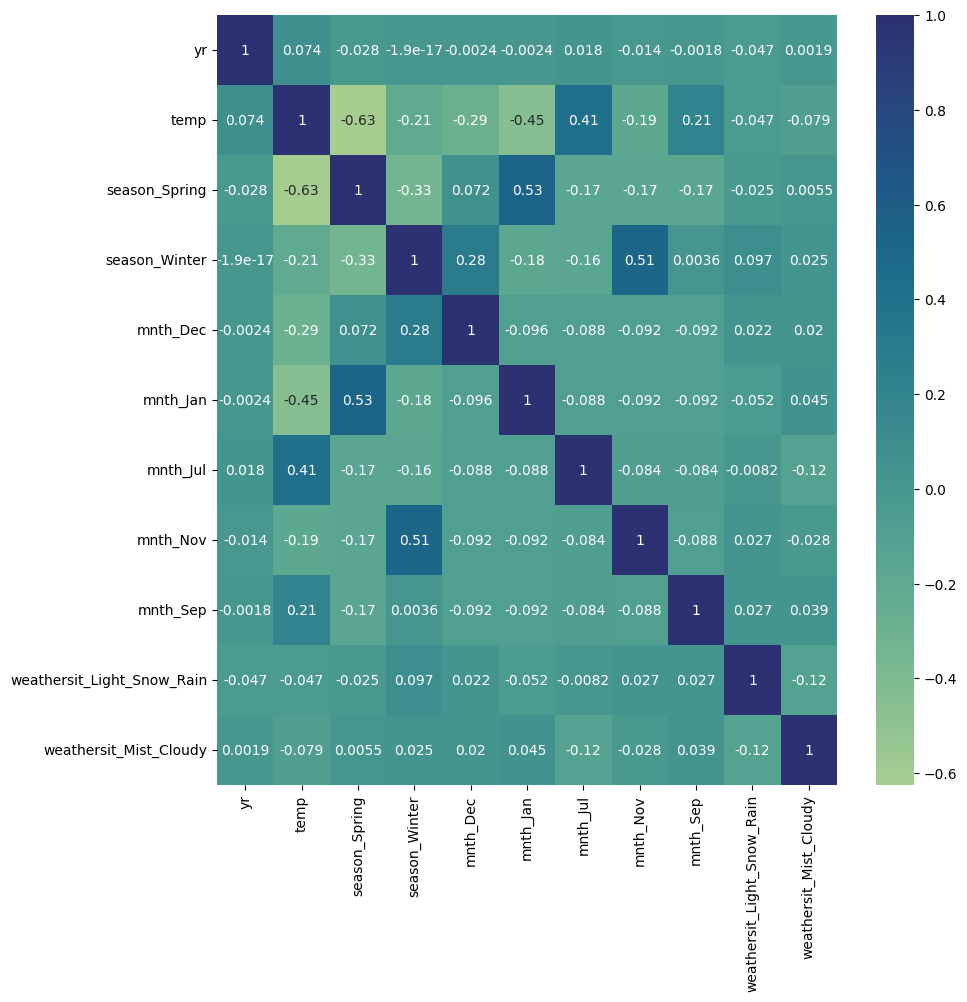

In [404]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr(), annot = True, cmap="crest")
plt.show()

**Observation**
* **mnth_Nov**, **mnth_Jan** and **mnth_Dec** has the **high corr** with other params to make precise we can remove the above params

In [405]:
X_train.drop('mnth_Nov',axis='columns', inplace=True)

In [406]:
X_train.drop('mnth_Jan',axis='columns', inplace=True)

In [407]:
X_train.drop('mnth_Dec',axis='columns', inplace=True)

**Model19:**

In [408]:
X_train_new=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     326.4
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          3.52e-208
Time:                        21:23:12   Log-Likelihood:                 542.10
No. Observations:                 584   AIC:                            -1066.
Df Residuals:                     575   BIC:                            -1027.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [409]:
df=X_train
VIF_df=pd.DataFrame()
VIF_df['Features']=df.columns
VIF_df['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 2)
VIF_df = VIF_df.sort_values(by = "VIF", ascending = False)
print(VIF_df)

                     Features   VIF
1                        temp  2.92
0                          yr  2.05
7      weathersit_Mist_Cloudy  1.51
3               season_Winter  1.33
4                    mnth_Jul  1.33
2               season_Spring  1.24
5                    mnth_Sep  1.18
6  weathersit_Light_Snow_Rain  1.05


**Observation:**

* **R2**: 0.82
* **R2-Adj**: 0.817
* **P-Value**: Looks Good
* **VIF**: Looks Good

**Action:**
No action needed
**Note:**
* P-value should be < 0.05
* VIF < 5 is a good fit

**Validating the corr again before finalize the model **

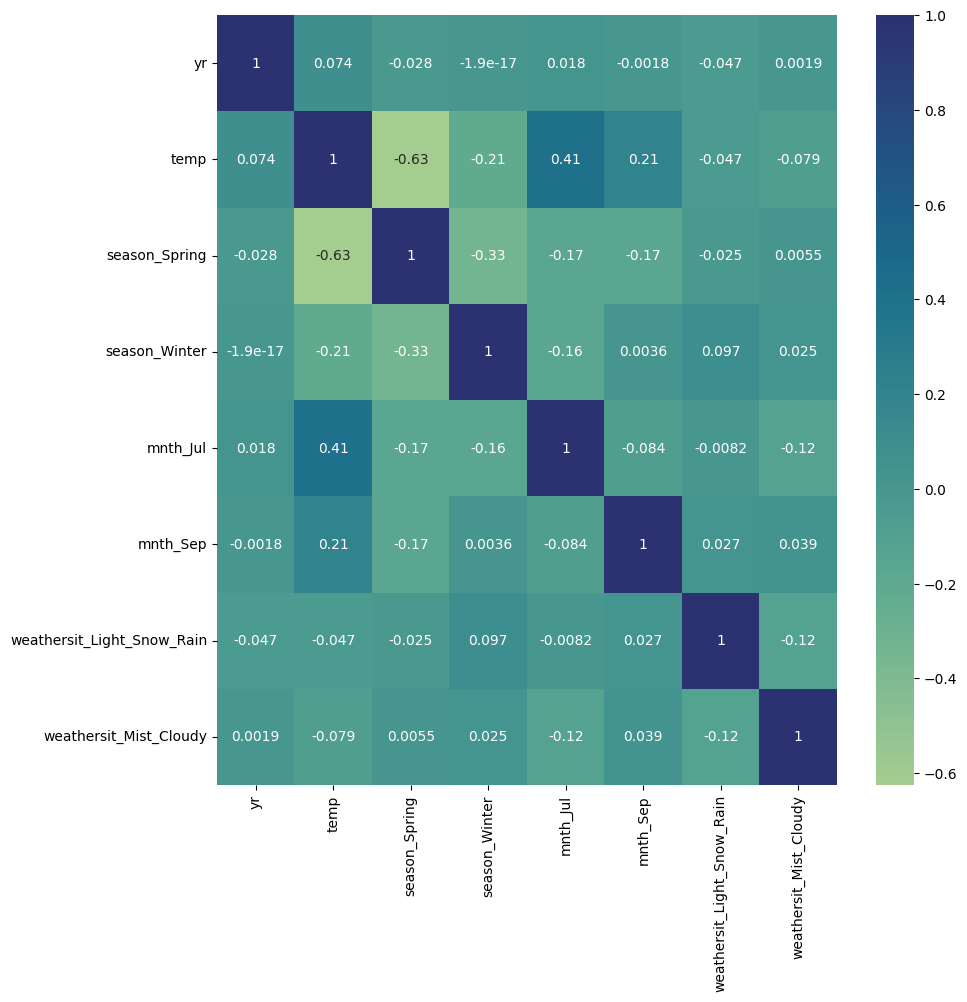

In [410]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr(), annot = True, cmap="crest")
plt.show()

**Model looks absolutely perfect, since temp has corr with other params let's not remove since there is high liner relation between temp and cnt(target variable)**

# **Final Model Interpretation**

**Null Hypothesis**

In [411]:
lm1.params

const                         0.185030
yr                            0.230634
temp                          0.488492
season_Spring                -0.118842
season_Winter                 0.058197
mnth_Jul                     -0.071505
mnth_Sep                      0.054238
weathersit_Light_Snow_Rain   -0.301556
weathersit_Mist_Cloudy       -0.074717
dtype: float64

From the lr6 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

## **Assumptions:**

**Residual Analysis**

In [412]:
y_train_pred = lm1.predict(X_train_new)

Text(0.5, 0, 'Errors')

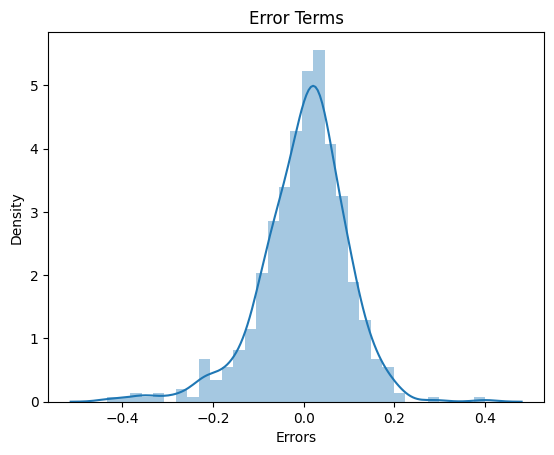

In [413]:
sns.distplot(y_train-y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')

**Observation:**

**Errors are normally distribured here with mean 0. So everything seems to be fine**

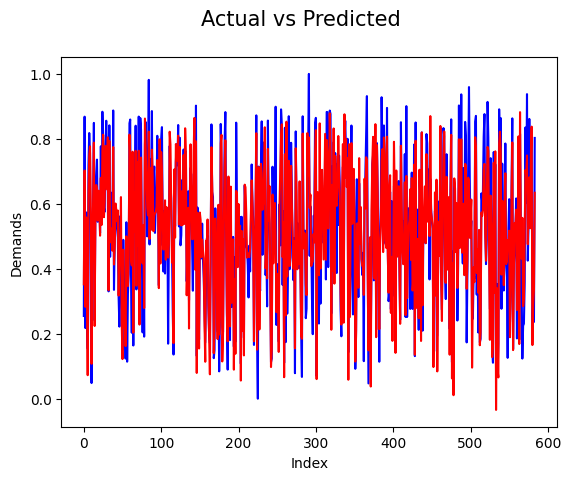

In [414]:
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

**Observation:**

**Actual vs Predicted seems similar so this model looks good**

**Checking the R2 score**

In [415]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8195564314872248

**R-squared Value is same as we predicted in the last model: 0.819**


# **Evaluating the final Model with the test data**

**Scalling**

In [416]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [417]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [418]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.746575,0.569603,0.542752,0.635933,0.315127,0.517368,0.226027,0.273973,...,0.054795,0.089041,0.123288,0.116438,0.102740,0.171233,0.178082,0.089041,0.034247,0.315068
std,0.498699,0.182488,0.436469,0.238088,0.222120,0.156357,0.161524,0.212757,0.419697,0.447530,...,0.228362,0.285783,0.329899,0.321854,0.304664,0.378009,0.383899,0.285783,0.182488,0.466142
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.359075,0.346732,0.534457,0.196160,0.391251,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,0.544652,0.614856,0.306383,0.508916,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.801929,0.743337,0.730570,0.411976,0.649994,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.800793,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Creating X_test and y_test

In [419]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 184 to 360
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          146 non-null    int64  
 1   holiday                     146 non-null    int64  
 2   workingday                  146 non-null    int64  
 3   temp                        146 non-null    float64
 4   atemp                       146 non-null    float64
 5   hum                         146 non-null    float64
 6   windspeed                   146 non-null    float64
 7   season_Spring               146 non-null    int64  
 8   season_Summer               146 non-null    int64  
 9   season_Winter               146 non-null    int64  
 10  mnth_Aug                    146 non-null    int64  
 11  mnth_Dec                    146 non-null    int64  
 12  mnth_Feb                    146 non-null    int64  
 13  mnth_Jan                    146 non-nu

To parse the selected feature we are using the lm1.params from the train model

In [420]:
col=['yr','temp','season_Spring','season_Winter','mnth_Jul','mnth_Sep','weathersit_Light_Snow_Rain','weathersit_Mist_Cloudy']

In [421]:
X_test=X_test[col]
# Adding constant variable to test dataframe
X_test_lm1 = sm.add_constant(X_test)
X_test_lm1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 184 to 360
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       146 non-null    float64
 1   yr                          146 non-null    int64  
 2   temp                        146 non-null    float64
 3   season_Spring               146 non-null    int64  
 4   season_Winter               146 non-null    int64  
 5   mnth_Jul                    146 non-null    int64  
 6   mnth_Sep                    146 non-null    int64  
 7   weathersit_Light_Snow_Rain  146 non-null    int64  
 8   weathersit_Mist_Cloudy      146 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 11.4 KB


In [422]:
y_test_pred = lm1.predict(X_test_lm1)

In [423]:
r2_score(y_test, y_test_pred)


0.7919791167382211

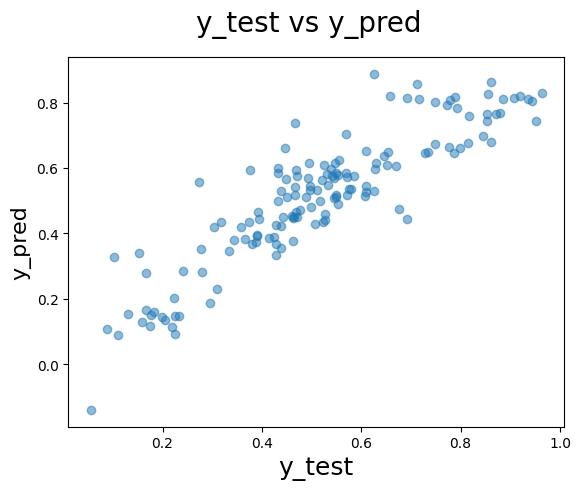

In [424]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [425]:
round(lm1.params,4)

const                         0.1850
yr                            0.2306
temp                          0.4885
season_Spring                -0.1188
season_Winter                 0.0582
mnth_Jul                     -0.0715
mnth_Sep                      0.0542
weathersit_Light_Snow_Rain   -0.3016
weathersit_Mist_Cloudy       -0.0747
dtype: float64

# **Finaly Model After Validation**

*cnt(y)=0.1850+yrX(0.2306)+tempX(0.4885)+season_SpringX(-0.1188)+season_WinterX(0.0582)+mnth_JulX(-0.0715)+mnth_SepX(0.0542)+weathersit_Light_Snow_RainX(-0.3016)+weathersit_Mist_CloudyX(-0.0747)*

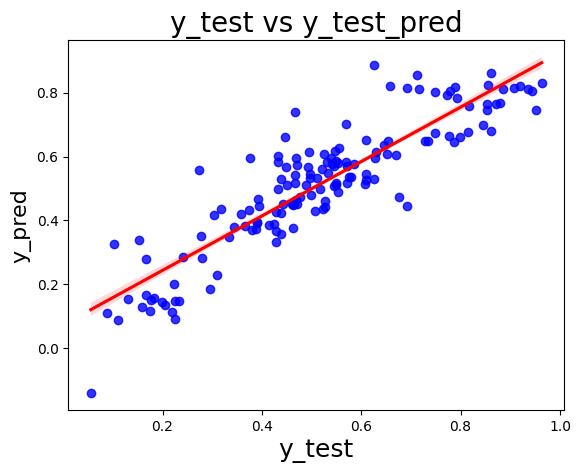

In [426]:
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

**Comparision between Training and Testing dataset:**
* **Train dataset R^2**          : **0.8195564314872248**
* **Test dataset R^2**           : **0.7919791167382211**


# **Based on the provided results, here is a comprehensive conclusion:**

## **Model Performance**

* **Train dataset R^2** : **0.8195564314872248**
* **Test dataset R^2** : **0.7919791167382211**

These R-squared values indicate that the model explains approximately 81.96% of the variance in the target variable on the training set and 79.20% on the test set. This demonstrates that the model generalizes well and performs consistently across both the training and test datasets.

## **Regression Equation**
The regression equation for predicting the target variable

`cnt(y)=0.1850+yrX(0.2306)+tempX(0.4885)+season_SpringX(-0.1188)+season_WinterX(0.0582)+mnth_JulX(-0.0715)+mnth_SepX(0.0542)+weathersit_Light_Snow_RainX(-0.3016)+weathersit_Mist_CloudyX(-0.0747)`


## **Interpretation of Coefficients**
* **yr (0.2306):** Indicates a positive impact on the target variable. As the year progresses, the target variable tends to increase.
* **temp (0.4885):** Suggests a strong positive relationship with the target variable. Higher temperatures are associated with higher counts.
* **season_Spring (-0.1188):** Implies that counts are lower in the Spring season compared to the reference season.
* **season_Winter (0.0582):** Suggests a slight increase in counts during the Winter season.
* **mnth_Jul (-0.0715):** Indicates that counts are lower in July compared to other months.
* **mnth_Sep (0.0542):** Indicates that counts are slightly higher in September compared to other months.
* **weathersit_Light_Snow_Rain (-0.3016):** Shows a strong negative impact. Light snow or rain significantly reduces the counts.
* **weathersit_Mist_Cloudy (-0.0747):** Indicates a decrease in counts during misty or cloudy weather, although the effect is smaller than for light snow or rain.

## **Residual Analysis**
The residual errors of the model are normally distributed with a mean of 0. This suggests that the model's assumptions are likely satisfied, and there are no significant patterns in the residuals that would indicate a problem with the model.

## **Conclusion**
Overall, the model appears to perform well, explaining a substantial portion of the variance in the target variable and showing good generalization across the training and test datasets. The coefficients indicate that temperature and year are significant positive predictors, while certain seasons, months, and weather conditions can negatively impact the target variable. The normal distribution of residuals further validates the reliability of the model.